### **4.4** Comparing a Convolutional NN with Different Optmizers (Adam, Adagrad, RMSprop):

In [ ]:
def createCNN(input_shape, activation, d):
  model = Sequential()
  model.add(Conv2D(32, (3, 3), padding='same',input_shape = input_shape))
  model.add(Activation(activation))
  model.add(Conv2D(32, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25*d))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25*d))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation(activation))
  model.add(Dropout(0.5*d))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [ ]:
def trainNet(model, x_train, y_train, x_validate, y_validate, batch_size, epochs, data_augmentation, save_best_model):

# train without data augmentation
  if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        shuffle=True,
                        callbacks=[save_best_model])
# train with data augmentation
  else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                        steps_per_epoch=math.ceil(x_train.shape[0]/batch_size),
                        epochs=epochs,
                        validation_data=(x_validate, y_validate),
                        callbacks=[save_best_model])
  return history


In [ ]:
def loadData():
  # Load the data, split between train and test sets:
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  # print('x_train shape:', x_train.shape)
  # print(x_train.shape[0], 'train samples')
  # print(x_test.shape[0], 'test samples')

  # Convert class vectors to binary class matrices.
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')
  x_train /= 255
  x_test /= 255
  
  feature_vector_length = 32*32*3
  x_train_flat = x_train.reshape(x_train.shape[0], feature_vector_length)
  x_test_flat = x_test.reshape(x_test.shape[0], feature_vector_length)

  x_validate = x_train[40000:,:]
  x_train = x_train[:40000,:]
  y_validate = y_train[40000:,:]
  y_train = y_train[:40000,:]

  x_validate_flat = x_train_flat[40000:,:]
  x_train_flat = x_train_flat[:40000,:]
  
  return x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat 

Not using data augmentation.
Epoch 1/20
1246/1250 [============================>.] - ETA: 0s - loss: 1.8231 - accuracy: 0.3384
Epoch 00001: val_accuracy improved from -inf to 0.43990, saving model to best_model_CNN_1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8224 - accuracy: 0.3386 - val_loss: 1.5528 - val_accuracy: 0.4399
Epoch 2/20
1250/1250 [==============================] - ETA: 0s - loss: 1.5071 - accuracy: 0.4565
Epoch 00002: val_accuracy improved from 0.43990 to 0.51880, saving model to best_model_CNN_1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5071 - accuracy: 0.4565 - val_loss: 1.3535 - val_accuracy: 0.5188
Epoch 3/20
1245/1250 [============================>.] - ETA: 0s - loss: 1.3638 - accuracy: 0.5104
Epoch 00003: val_accuracy improved from 0.51880 to 0.54690, saving model to best_model_CNN_1.h5
1250/1250 [==============================] - 7s 6ms/step - loss: 1.3636 - accuracy: 0.5102 - val_loss: 1.2656 - val_accuracy: 

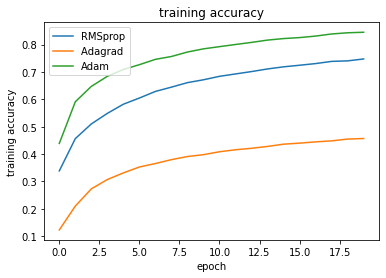

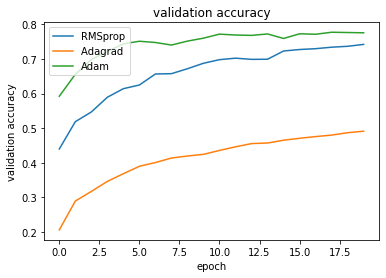

313/313 [==============================] - 1s 3ms/step - loss: 0.7527 - accuracy: 0.7424
Test accuracy for CNN with RMSprop optimizer: 0.7423999905586243
313/313 [==============================] - 1s 3ms/step - loss: 1.4187 - accuracy: 0.4959
Test accuracy for CNN with Adagrad optimizer: 0.4959000051021576
313/313 [==============================] - 1s 3ms/step - loss: 0.7021 - accuracy: 0.7670
Test accuracy for CNN with Adam optimizer: 0.7670000195503235


In [ ]:
# libraries (do not import additional libraries)
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import math
import matplotlib.pyplot as plt

# parameters for this script
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False

x_train, x_validate, x_test, y_train, y_validate, y_test, x_train_flat, x_validate_flat, x_test_flat = loadData()

# Define a convolutional neural network
model_CNN_1 = createCNN(input_shape=x_train.shape[1:], activation ='relu', d = 1)
model_CNN_2 = createCNN(input_shape=x_train.shape[1:], activation ='relu', d = 1)
model_CNN_3 = createCNN(input_shape=x_train.shape[1:], activation ='relu', d = 1)

# initiate RMSprop optimizer
opt1 = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
opt2 = keras.optimizers.Adagrad()
opt3 = keras.optimizers.Adam()
# Compile the model before using it
model_CNN_1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])
model_CNN_2.compile(loss='categorical_crossentropy', optimizer=opt2, metrics=['accuracy'])
model_CNN_3.compile(loss='categorical_crossentropy', optimizer=opt3, metrics=['accuracy'])

# print(model.summary())

# create a callback that will save the best model while training
save_best_model_CNN_1 = ModelCheckpoint('best_model_CNN_1.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_2 = ModelCheckpoint('best_model_CNN_2.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
save_best_model_CNN_3 = ModelCheckpoint('best_model_CNN_3.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# train model
history_CNN_1= trainNet(model_CNN_1, x_train, y_train, x_validate, y_validate, batch_size, epochs, 0, save_best_model_CNN_1)
history_CNN_2 = trainNet(model_CNN_2, x_train, y_train, x_validate, y_validate, batch_size, epochs, 0, save_best_model_CNN_2)
history_CNN_3 = trainNet(model_CNN_3, x_train, y_train, x_validate, y_validate, batch_size, epochs, 0, save_best_model_CNN_3)

# Plot training accuracy
plt.plot(history_CNN_1.history['accuracy'])
plt.plot(history_CNN_2.history['accuracy'])
plt.plot(history_CNN_3.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adagrad ','Adam'], loc='upper left')
plt.show()

# Plot validation accuracy
plt.plot(history_CNN_1.history['val_accuracy'])
plt.plot(history_CNN_2.history['val_accuracy'])
plt.plot(history_CNN_3.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop','Adagrad ','Adam'], loc='upper left')
plt.show()

# Evaluate the best model saved (i.e., model with best validation accuracy) on the test set
saved_model_CNN_1 = load_model('best_model_CNN_1.h5')
scores = saved_model_CNN_1.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with RMSprop optimizer:', scores[1])

saved_model_CNN_2 = load_model('best_model_CNN_2.h5')
scores = saved_model_CNN_2.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with Adagrad optimizer:', scores[1])

saved_model_CNN_3= load_model('best_model_CNN_3.h5')
scores = saved_model_CNN_3.evaluate(x_test, y_test, verbose=1)
print('Test accuracy for CNN with Adam optimizer:', scores[1])





according to "A Comparative Analysis of Gradient Descent-Based
Optimization Algorithms on Convolutional Neural
Networks" By **Dogo et al :**
Their findings revealed that the performance of each optimizer varied from
each dataset, which confirms the effect that the data type and size plays on the performance of the different optimizers. So, the performance of each algorithm differ based on the data we are dealing with and that is because of the difference in step size, convergence and other factors of each algorithm mentioned below.


**Adagrad** is an algorithm for gradient-based optimization that does just 
this: It adapts the learning rate to the parameters, performing smaller updates
(i.e. low learning rates) for parameters associated with frequently occurring features, and larger updates (i.e. high learning rates) for parameters associated with infrequent features. For this reason, it is well-suited for dealing with sparse data. Adagrad decay the learning rate for parameters in proportion to their update history (more updates means more decay).It is clear from the update rule that history of the gradient is accumulated. The smaller the gradient accumulated, the smaller the value will be, leading to a bigger learning rate. By using a parameter specific learning rate AdaGrad ensures that despite sparsity w gets a higher learning rate and hence larger updates. Furthermore, it also ensures that if b undergoes a lot of updates, its effective learning rate decreases because of the growing denominator. In practice, this does not work so well if we remove the square root from the denominator. This means over time the effective learning rate for b will decay to an extent that there will be no further updates to b.As it can be seen in the charts the increase in the accuracy for Adagrad suddenly stops and the learning somehow stops or decay. This could be solved by RMSProp.


**RMSprop** is an unpublished, adaptive learning rate method proposed by Geoff Hinton. RMSprop have been developed stemming from the need to resolve Adagrad's radically diminishing learning rates. In addition to storing an exponentially decaying average of past squared gradients like RMSprop, Adam also keeps an exponentially decaying average of past gradients. AdaGrad decays the learning rate very aggressively (as the denominator grows). As a result, after a while, the frequent parameters will start receiving very small updates because of the decayed learning rate. To avoid this why not decay the denominator and prevent its rapid growth. AdaGrad got stuck when it is close to convergence, it was no longer able to move in the vertical (b) direction because of the decayed learning rate. RMSProp overcomes this problem by being less aggressive on the decay.

**Adam:** do everything that RMSProp does to solve the denominator decay problem of AdaGrad. In addition to that, use a cumulative history of gradients.
Notice that the update rule for Adam is very similar to RMSProp, except we look at the cumulative history of gradients as well. In summary, Adam combines the best properties of RMSProp and AdaGrad to work well even with noisy or sparse datasets. That is why in our result it can be seen that Adam has the best accuracy of all.

This was extracted from:https://towardsdatascience.com/learning-parameters-part-5-65a2f3583f7d


For a 100 epoch: This trends go on.

